In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [160]:
hbg = pd.read_csv("./data/hbg_result1591.csv", index_col=0)

In [161]:
h = hbg.copy()
h.head()

,Contents,Like,ID,Tags
0,"""연봉 100억"" 일타강사 이지영,,다이어트 방법데일리 업데잇 @book5657s ...",12,book5657s,"['#약수핫플', '#경성대맛집', '#양천구떡케이크', '#신촌네일', '#동안구..."
1,?세계적인 스타 셰프 고든램지의 '고든 램지 버거'가 캐주얼 콘셉트로 새롭게 '고든...,395,etc_zine,[]
2,.아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠??송탄미군부대 앞에 있는 #미스진...,1517,songs_kitchens,"['#미스진버거미군들한테', '#송탄', '#미스진버거??스페셜A(7', '#송탄맛..."
3,?<통새우폭탄버거>?????????????????먹시인입 속을 가득 채우는 탱글한 ...,4265,mukseein,"['#왓더버거??', '#직화통새우버거', '#셧더버거', '#햄버거맛집', '#새..."
4,꿀 같은데 헬인 알바 모음??@@카페 알바 누가 꿀이래ㅜㅜ.오늘의 꿀팁은?? @la...,664,lady_good_tip,"['#헬', '#헬인알바', '#꿀알바', '#알바모음', '#아르바이트', '#카..."


In [64]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1591 non-null   object
 1   Like      1591 non-null   object
 2   ID        1591 non-null   object
 3   Tags      1591 non-null   object
dtypes: object(4)
memory usage: 62.1+ KB


## 1. 전처리 1 
- 워드클라우드
- Contents 특수기호 및 문자 제거
- like ~외 좋아합니다/ 좋아요 눌러보세요 등 숫자 이외의 행 교체

#### 1) contents/tags 전처리

In [162]:
# contents 특수기호 및 문자 제거
h["Contents"] = h["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

# # tags # 제외한 특수 기호 제거
h["Tags"] = h["Tags"].str.strip("]['")
h["Tags"] = h["Tags"].str.replace("'", repl=r"", regex=True)

In [163]:
h.head()

,Contents,Like,ID,Tags
0,연봉 100억 일타강사 이지영 다이어트 방법데일리 업데잇 book5657s ...,12,book5657s,"#약수핫플, #경성대맛집, #양천구떡케이크, #신촌네일, #동안구맛집추천, #수유데..."
1,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,395,etc_zine,
2,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,1517,songs_kitchens,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버..."
3,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,4265,mukseein,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집..."
4,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,664,lady_good_tip,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버..."


In [164]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [165]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(h["Contents"]))):
    content_all = content_all + ' ' + h["Contents"].loc[i]

C:\Users\somin\AppData\Local\Temp\ipykernel_20464\3171243301.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(h["Contents"]))):


  0%|          | 0/1591 [00:00<?, ?it/s]

In [142]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

'  연봉 억  일타강사 이지영  다이어트 방법데일리 업데잇     출처     문제시 주시면 삭제하겠습니다   약수핫플  경성대맛집  양천구떡케이크  신촌네일  동안구맛집추천  수유데이트코스  자연산막회  대학생코디  장어  성신여대맛집  카페맛집  스타벅스  부암동네일  청담눈썹문신  햄버거  노원핫플  건대눈썹문신  보라매눈썹문신  강동구네일  일산가로수길  세계적인 스타 셰프 고든램지의  고든 램지 버거 가 캐주얼 콘셉트로 새롭게  고든 램지 스트리트 버거 를 아시아 최초로 국내에서 오픈합니다   고든 램지 스트리트 버거 는 지난 년 영국에서 첫 런칭한 브랜드로 기존  고든 램지 버거 보다 상대적으로 저렴한  만원대 버거를 선보이는 매장입니다  이번에 아시아 최초로 한국에 오픈하는  고든 램지 스트리트 버거 에서는 한국인들을 위해 김치와 베이컨이 들어간  코리안 스매시 버거   소고기 패티를 활용한     버거   프라이드 치킨을 활용한      버거  등 가지 버거와 감자튀김 그리고 음료 등을 판매할 예정입니다  오는 월  현대백화점 무역센터점 지하 층에서 만나보실 수 있습니다       추후 업데이트 되는 소식에 관해서는   앱을 통해 수시로 확인하여 알림드리도록 하겠습니다   플레이 스토어   앱 스토어에서  이티씨  검색 또는 인스타 프로필 링크를 통해    앱을 다운받으실 수 있습니다   다운로드 링크           아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠  송탄미군부대 앞에 있는  미스진버거미군들한테 팔기 위해 하나둘씩햄버거집이 생겼다는데  이제는 명물이 되버린 송탄식버거  패티 소세지 계란후라이 양배추 양파넘치게 쌓아주시는데길거리토스트의 햄버거 버전같기두 케요네즈 범벅이라 넘 좋았다는    소세지는 딱 부찌에 든 길쭉이햄 송탄 부찌가 유명해서 이런 햄을 넣는듯해요 짭짜롬하니 밥반찬같고 야채도 세상 많아서 전 넘 맛나더라고여  스페셜 젤잘나감 이 천원이라다소 비싼감은 있지만 케요네즈  옛날토스트 좋아하는 분들은 분명 맛나게 드실듯 

In [143]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['연봉',
 '억',
 '강사',
 '이지영',
 '다이어트',
 '방법',
 '데',
 '일리',
 '업데',
 '출처',
 '제시',
 '주시',
 '삭제',
 '핫',
 '경성대',
 '맛집',
 '양천구',
 '떡케이크',
 '신촌',
 '네일',
 '동안구',
 '맛집',
 '추천',
 '수유',
 '데이트',
 '코스',
 '자연',
 '산막',
 '회',
 '대학생',
 '코디',
 '장어',
 '성신여대',
 '맛집',
 '카페',
 '맛집',
 '스타벅스',
 '부암동',
 '네일',
 '청담',
 '눈썹',
 '문신',
 '햄버거',
 '노원',
 '핫',
 '건대',
 '눈썹',
 '문신',
 '보라매',
 '눈썹',
 '문신',
 '강동구',
 '네일',
 '일산',
 '가로수길',
 '세계',
 '스타',
 '셰프',
 '고든',
 '램지',
 '고든',
 '램지',
 '버거',
 '캐',
 '주얼',
 '콘셉트',
 '고든',
 '램지',
 '스트리트',
 '버거',
 '를',
 '아시아',
 '최초',
 '국내',
 '오픈',
 '고든',
 '램지',
 '스트리트',
 '버거',
 '지난',
 '년',
 '영국',
 '첫',
 '런칭',
 '브랜드',
 '기존',
 '고든',
 '램지',
 '버거',
 '상대',
 '만원',
 '버거',
 '매장',
 '이번',
 '아시아',
 '최초',
 '한국',
 '오픈',
 '고든',
 '램지',
 '스트리트',
 '버거',
 '한국인',
 '위해',
 '김치',
 '베이컨',
 '코리안',
 '스매시',
 '버거',
 '소고기',
 '패티',
 '활용',
 '버거',
 '프라이드',
 '치킨',
 '활용',
 '버거',
 '등',
 '가지',
 '버거',
 '감자',
 '튀김',
 '음료',
 '등',
 '판매',
 '예정',
 '월',
 '현대',
 '백화점',
 '무역',
 '센터',
 '점',
 '지하',
 '층',
 '수',
 '추후',
 '업데이트',
 '소식',
 '관',
 '앱

In [144]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('버거', 3077),
 ('햄버거', 2249),
 ('맛집', 2196),
 ('수제', 1133),
 ('그램', 887),
 ('스타', 794),
 ('패티', 553),
 ('주문', 430),
 ('추천', 380),
 ('잠실', 362),
 ('치킨', 350),
 ('맛', 344),
 ('오늘', 261),
 ('메뉴', 252),
 ('집', 229),
 ('점심', 225),
 ('일상', 212),
 ('더', 205),
 ('단체', 204),
 ('새우', 195),
 ('맞팔', 194),
 ('번', 185),
 ('데이트', 177),
 ('튀김', 177),
 ('곳', 176),
 ('소스', 171),
 ('간식', 169),
 ('치즈', 166),
 ('감자', 162),
 ('맛스타', 161),
 ('육즙', 160),
 ('점', 157),
 ('서울', 155),
 ('소고기', 151),
 ('아이', 150),
 ('버거킹', 144),
 ('먹방', 140),
 ('세트', 134),
 ('야채', 133),
 ('월', 132),
 ('수', 132),
 ('카페', 131),
 ('롯데리아', 128),
 ('감', 127),
 ('호', 126),
 ('향', 125),
 ('꼭', 122),
 ('치즈버거', 119),
 ('길', 118),
 ('매일', 117),
 ('직접', 116),
 ('원', 115),
 ('음식', 115),
 ('사용', 114),
 ('것', 114),
 ('빵', 113),
 ('저녁', 113),
 ('여행', 112),
 ('배달', 111),
 ('식감', 107),
 ('버터', 107),
 ('롯데', 107),
 ('맥도날드', 106),
 ('핫', 103),
 ('시간', 102),
 ('모든', 102),
 ('때', 101),
 ('포항', 101),
 ('전문점', 100),
 ('소통', 99),
 ('월드', 98),
 ('폭', 97)

In [145]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

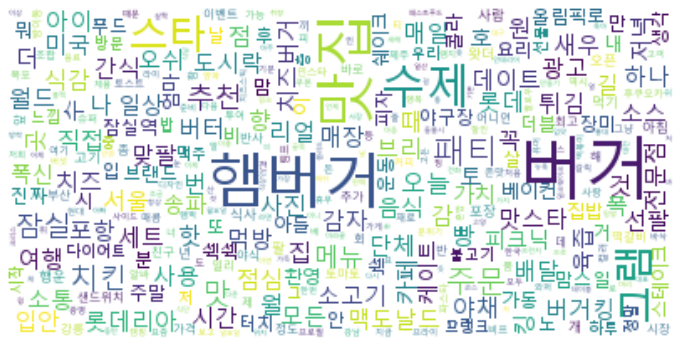

In [147]:
STOPWORDS.add('said')
STOPWORDS

pasta_wc = WordCloud(max_font_size=40, background_color="white", stopwords=STOPWORDS, max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(pasta_wc, interpolation="bilinear")
plt.axis("off")

#### 2_1) like 전처리 : 평균

In [145]:
# 중간값
num = h[~(h["Like"].str.contains("좋아합니")|h["Like"].str.contains("눌러보세"))]["Like"]
num = num.astype(int)
num.sum()/len(num)    # 92.5

92.46656649135988

In [146]:
h["Like"].str.contains("좋아합니").value_counts()

False    1338
True      253
Name: Like, dtype: int64

In [147]:
h["Like"].str.contains("눌러보세").value_counts()

False    1584
True        7
Name: Like, dtype: int64

In [148]:
like_str_idx = h[h["Like"].str.contains("좋아합니")].index
like_0_idx = h[h["Like"].str.contains("눌러보세")].index

In [149]:
for i in range(len(h)):
    for j in like_str_idx:
        for k in like_0_idx:
            if i==j:
                h["Like"][j]=92.5
            elif i==k:
                h["Like"][k]=0
            else:
                continue

In [150]:
h["Like"].str.contains("좋아합니").value_counts()

False    1331
Name: Like, dtype: int64

In [151]:
h["Like"].str.contains("눌러보세").value_counts()

False    1331
Name: Like, dtype: int64

In [152]:
h["Like"] = h["Like"].astype("int")

In [153]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1591 non-null   object
 1   Like      1591 non-null   int32 
 2   ID        1591 non-null   object
 3   Tags      1591 non-null   object
dtypes: int32(1), object(3)
memory usage: 120.5+ KB


In [154]:
h.to_csv("./data/hbg1_avg.csv")

#### 2_2) like 전처리 : 중간값

In [100]:
# 중간값
num = h[~(h["Like"].str.contains("좋아합니")|h["Like"].str.contains("눌러보세"))]["Like"]
num = num.astype(int)
num.median()

25.0

In [101]:
h["Like"].str.contains("좋아합니").value_counts()

False    1338
True      253
Name: Like, dtype: int64

In [102]:
h["Like"].str.contains("눌러보세").value_counts()

False    1584
True        7
Name: Like, dtype: int64

In [103]:
like_str_idx = h[h["Like"].str.contains("좋아합니")].index
like_0_idx = h[h["Like"].str.contains("눌러보세")].index

In [105]:
for i in range(len(h)):
    for j in like_str_idx:
        for k in like_0_idx:
            if i==j:
                h["Like"][j]=25
            if i==k:
                h["Like"][k]=0
            else:
                continue

In [106]:
h["Like"].str.contains("좋아합니").value_counts()

False    1331
Name: Like, dtype: int64

In [107]:
h["Like"].str.contains("눌러보세").value_counts()

False    1331
Name: Like, dtype: int64

In [108]:
h["Like"] = h["Like"].astype("int")

In [109]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1591 non-null   object
 1   Like      1591 non-null   int32 
 2   ID        1591 non-null   object
 3   Tags      1591 non-null   object
dtypes: int32(1), object(3)
memory usage: 120.5+ KB


In [111]:
h.to_csv("./data/hbg1_med.csv")

In [137]:
id = h["ID"].unique()
id = pd.DataFrame(id)

In [140]:
id[210
   :]

,0
210,hey_laura_myluv
211,pig_zzisu
212,lulyn_yammy
213,muchanda3
214,lala.lapk
...,...
1301,s_reetl_ght
1302,itzel_day_
1303,gwimjjijji
1304,yongseongjhkim


## 2. 전처리 2
- Contents에서 연관성 높은 키워드 포함된 행 추출
- Like 정규화 및 평균 이하 제거

In [174]:
# Contents에서 연관성 높은 키워드 포함된 행 추출

h_content_high = h[h["Contents"].str.contains(r"협찬|광고|추천|맛집|그램|버거|수제")]

In [175]:
h_content_high.reset_index(drop=True, inplace=True)

In [176]:
h_content_high

,Contents,Like,ID,Tags
0,연봉 100억 일타강사 이지영 다이어트 방법데일리 업데잇 book5657s ...,12,book5657s,"#약수핫플, #경성대맛집, #양천구떡케이크, #신촌네일, #동안구맛집추천, #수유데..."
1,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,395,etc_zine,
2,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,1517,songs_kitchens,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버..."
3,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,4265,mukseein,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집..."
4,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,664,lady_good_tip,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버..."
...,...,...,...,...
1415,대전수제버거 파이어벨 닥터레오버거set16 000원 치즈후라이 2 00...,60,muksta_yongza,"#대전수제버거, #파이어벨????닥터레오버거set16, #대전수제버거맛집, #대전햄..."
1416,2023 01 06 shakeshack 쉐이크쉑 햄버거 의 근본 쉑스...,30,yum2_yum22,"#shakeshack, #쉐이크쉑, #햄버거, #쉑스택고기패티, #쉑버거, #내돈내..."
1417,제주 판타스틱버거 제주특별자치도 서귀포시 표선면 토산중앙로15번길 6 ...,180,gwimjjijji,"#판타스틱버거, #제주판타스틱버거, #제주수제버거, #수제버거, #햄버거, #버거맛..."
1418,최애햄버거 더블패티는 기본 fiveguysburgers 파이브가이즈 햄버거,15,yongseongjhkim,"#fiveguysburgers, #파이브가이즈, #햄버거"


In [184]:
# Like 정규화 및 평균 이하 제거 

h_like = h_content_high["Like"].copy()
h_like = pd.DataFrame(h_like)
h_like.head()

,Like
0,12
1,395
2,1517
3,4265
4,664


In [185]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxcaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(h_like)
h_like_scaled = scaler.transform(h_like)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
like_scaled = pd.DataFrame(data=h_like_scaled)

In [186]:
like_scaled.columns=["like_scaled"]
like_scaled.head()

,like_scaled
0,0.002076
1,0.068339
2,0.262457
3,0.737889
4,0.114879


In [187]:
h_scaled = pd.concat([h_content_high, like_scaled], axis=1)
h_scaled

,Contents,Like,ID,Tags,like_scaled
0,연봉 100억 일타강사 이지영 다이어트 방법데일리 업데잇 book5657s ...,12,book5657s,"#약수핫플, #경성대맛집, #양천구떡케이크, #신촌네일, #동안구맛집추천, #수유데...",0.002076
1,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,395,etc_zine,,0.068339
2,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,1517,songs_kitchens,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",0.262457
3,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,4265,mukseein,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",0.737889
4,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,664,lady_good_tip,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",0.114879
...,...,...,...,...,...
1415,대전수제버거 파이어벨 닥터레오버거set16 000원 치즈후라이 2 00...,60,muksta_yongza,"#대전수제버거, #파이어벨????닥터레오버거set16, #대전수제버거맛집, #대전햄...",0.010381
1416,2023 01 06 shakeshack 쉐이크쉑 햄버거 의 근본 쉑스...,30,yum2_yum22,"#shakeshack, #쉐이크쉑, #햄버거, #쉑스택고기패티, #쉑버거, #내돈내...",0.005190
1417,제주 판타스틱버거 제주특별자치도 서귀포시 표선면 토산중앙로15번길 6 ...,180,gwimjjijji,"#판타스틱버거, #제주판타스틱버거, #제주수제버거, #수제버거, #햄버거, #버거맛...",0.031142
1418,최애햄버거 더블패티는 기본 fiveguysburgers 파이브가이즈 햄버거,15,yongseongjhkim,"#fiveguysburgers, #파이브가이즈, #햄버거",0.002595


In [188]:
h_scaled = h_scaled[["ID", "Contents", "Tags", "Like", "like_scaled"]]
h_scaled

,ID,Contents,Tags,Like,like_scaled
0,book5657s,연봉 100억 일타강사 이지영 다이어트 방법데일리 업데잇 book5657s ...,"#약수핫플, #경성대맛집, #양천구떡케이크, #신촌네일, #동안구맛집추천, #수유데...",12,0.002076
1,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,,395,0.068339
2,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457
3,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889
4,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879
...,...,...,...,...,...
1415,muksta_yongza,대전수제버거 파이어벨 닥터레오버거set16 000원 치즈후라이 2 00...,"#대전수제버거, #파이어벨????닥터레오버거set16, #대전수제버거맛집, #대전햄...",60,0.010381
1416,yum2_yum22,2023 01 06 shakeshack 쉐이크쉑 햄버거 의 근본 쉑스...,"#shakeshack, #쉐이크쉑, #햄버거, #쉑스택고기패티, #쉑버거, #내돈내...",30,0.005190
1417,gwimjjijji,제주 판타스틱버거 제주특별자치도 서귀포시 표선면 토산중앙로15번길 6 ...,"#판타스틱버거, #제주판타스틱버거, #제주수제버거, #수제버거, #햄버거, #버거맛...",180,0.031142
1418,yongseongjhkim,최애햄버거 더블패티는 기본 fiveguysburgers 파이브가이즈 햄버거,"#fiveguysburgers, #파이브가이즈, #햄버거",15,0.002595


In [189]:
# 평균 : 0.015914453924432196
h_scaled["like_scaled"].sum()/len(like_scaled)

0.015926945757590526

In [300]:
h_scaled_avg = h_scaled[h_scaled["like_scaled"]>0.015926945757590526]

In [301]:
h_scaled_avg.reset_index(drop=True, inplace=True)
h_scaled_avg    # 216개

,ID,Contents,Tags,Like,like_scaled
0,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,,395,0.068339
1,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457
2,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889
3,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879
4,st_foodfighter,건들면 터진다 버거육즙이 전신 혈관과 세포 사이사이로 도핑당했다 수제버거 하나로 ...,"#톰바그, #파주맛집, #수제버거, #수제버거맛집, #운정맛집, #서울버거맛집, #...",1288,0.222837
...,...,...,...,...,...
211,junkuepark,텐핑거 텐핑거청담점 청담동팔자에 없는 청담동 열흘 햄버거 맛있는건 다 들어있...,"#텐핑거, #텐핑거청담점, #청담동팔자에, #햄버거, #토니로마스",129,0.022318
212,delight_9_1_4_,더백푸드트럭 위치 서울 용산구 신흥로20길 45 1 영수증 더백버거___...,"#더백푸드트럭, #수제버거, #더백버거, #칠리치즈프라이, #멕스칸그릴콘, #마약옥...",115,0.019896
213,pol_junee,D 77 오늘 N줄일기1 출근 전에 풀고 싶었는데 일어난 시간이 애매해서 방금...,,99,0.017128
214,gammiroun_,홍대 풀리너마이트모처럼 역대급 수제버거집을 찾았다 바로 홍대에 위치한 풀리너마이트 ...,"#풀리너마이트, #홍대수제버거",112,0.019377


## 3. 카테고리 상위 키워드로 비교

In [280]:
cols=["text", "count"]
h_text = pd.DataFrame(rank_text, columns=cols)
h_text_top10 = h_text.head(10)
h_text_top10

,text,count
0,버거,3077
1,햄버거,2249
2,맛집,2196
3,수제,1133
4,그램,887
5,스타,794
6,패티,553
7,주문,430
8,추천,380
9,잠실,362


In [281]:
top10 = list(h_text_top10["text"])
top10

['버거', '햄버거', '맛집', '수제', '그램', '스타', '패티', '주문', '추천', '잠실']

In [282]:
# h_scaled_avg["Tags"] = h_scaled_avg["Tags"].str.replace(pat=r'[^\w]', repl=' ', regex=True)

C:\Users\somin\AppData\Local\Temp\ipykernel_20464\1357733570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_scaled_avg["Tags"] = h_scaled_avg["Tags"].str.replace(pat=r'[^\w]', repl=' ', regex=True)


In [283]:
tags = list(h_scaled_avg["Tags"])
tags

['',
 ' 미스진버거미군들한테   송탄   미스진버거  스페셜A 7   송탄맛집   옛날햄버거   햄버거   햄버거맛집   길거리토스트   토스트맛집   송탄미군부대',
 ' 왓더버거     직화통새우버거   셧더버거   햄버거맛집   새우버거   버거맛집   수제버거   hamburger   양산맛집',
 ' 헬   헬인알바   꿀알바   알바모음   아르바이트   카페   배스킨   햄버거   피씨방   편의점   키즈카페   알바들',
 ' 톰바그   파주맛집   수제버거   수제버거맛집   운정맛집   서울버거맛집   스푸파_파주',
 ' 양키스버거앤피자   문래창작촌   머거킹_문래   문래동맛집   문래맛집   문래창작촌맛집   영등포맛집   신도림맛집   영등포구청맛집   서울맛집',
 ' 파주맛집   파주시맛집   운정맛집   야당맛집   경기도맛집   햄버거맛집   수제버거맛집   톰바그',
 ' 식스티즈ㅡ저렴한   마포맛집   마포수제버거   홍대맛집   홍대수제버거   홍대입구맛집   홍대핫플레이스   수제버거맛집   햄버거   burger   burgerlover',
 ' 사라다햄버거   비냉   햄버거   비빔냉면   청주맛집   서문동맛집   성안길맛집   성안길밥집   동그라미   청주동그라미   동그라미햄버거   청주노포   단촐한메뉴   청주502',
 ' 브로버거   수제버거   수제버거맛집   햄버거   햄버거맛집   햄버거스타그램   버거스타그램   버거   버거맛집   방이동맛집   방이역맛집   방이동먹자골목맛집   방이동맛집추천   올림픽공원맛집   광명맛집   광명역맛집   광명맛집추천',
 ' 수제버거   치킨버거   성수버거   성수맛집   건대맛집   구의맛집   성수역맛집   버거맛집   햄버거',
 ' 첫줄작년에',
 ' 디브랜딩프로젝트  ',
 ' 인앤아웃   inandoutburger   햄버거   hamburger   라스베가스   lasvegas   리더유   it리더   it   소통   소통해요

In [302]:
for i in top10:
    h_scaled_avg["cnt({})".format(i)] = h_scaled_avg["Tags"].str.count("{}".format(i))

C:\Users\somin\AppData\Local\Temp\ipykernel_20464\2213736915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_scaled_avg["cnt({})".format(i)] = h_scaled_avg["Tags"].str.count("{}".format(i))
C:\Users\somin\AppData\Local\Temp\ipykernel_20464\2213736915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_scaled_avg["cnt({})".format(i)] = h_scaled_avg["Tags"].str.count("{}".format(i))
C:\Users\somin\AppData\Local\Temp\ipykernel_20464\2213736915.py:2: SettingWithCopyWarning: 
A value is trying to be set 

In [303]:
h_scaled_avg.head()

,ID,Contents,Tags,Like,like_scaled,cnt(버거),cnt(햄버거),cnt(맛집),cnt(수제),cnt(그램),cnt(스타),cnt(패티),cnt(주문),cnt(추천),cnt(잠실)
0,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,,395,0.068339,0,0,0,0,0,0,0,0,0,0
1,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457,5,3,3,0,0,0,0,0,0,0
2,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889,7,1,3,1,0,0,0,0,0,0
3,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879,1,1,0,0,0,0,0,0,0,0
4,st_foodfighter,건들면 터진다 버거육즙이 전신 혈관과 세포 사이사이로 도핑당했다 수제버거 하나로 ...,"#톰바그, #파주맛집, #수제버거, #수제버거맛집, #운정맛집, #서울버거맛집, #...",1288,0.222837,3,0,4,2,0,0,0,0,0,0


In [352]:
h_scaled_avg["sum"] = h_scaled_avg[h_scaled_avg.columns[5:]].sum(axis=1)

C:\Users\somin\AppData\Local\Temp\ipykernel_20464\2409292404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_scaled_avg["sum"] = h_scaled_avg[h_scaled_avg.columns[5:]].sum(axis=1)


In [164]:
tag_sum

NameError: name 'tag_sum' is not defined

In [370]:
tag_sum=[]
for i in range(len(h_scaled_avg)):
    if len(h_scaled_avg["Tags"].str.split("#")[0]) == 1:
        tag_sum.append(len(h_scaled_avg["Tags"].str.split("#")[i][1:]))
    
h_scaled_avg["tag_sum"] = tag_sum

C:\Users\somin\AppData\Local\Temp\ipykernel_20464\3640703655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_scaled_avg["tag_sum"] = tag_sum


In [375]:
h_scaled_avg.head()

,ID,Contents,Tags,Like,like_scaled,cnt(버거),cnt(햄버거),cnt(맛집),cnt(수제),cnt(그램),cnt(스타),cnt(패티),cnt(주문),cnt(추천),cnt(잠실),sum,tag_sum
0,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,,395,0.068339,0,0,0,0,0,0,0,0,0,0,0,0
1,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457,5,3,3,0,0,0,0,0,0,0,11,10
2,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889,7,1,3,1,0,0,0,0,0,0,12,9
3,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879,1,1,0,0,0,0,0,0,0,0,2,12
4,st_foodfighter,건들면 터진다 버거육즙이 전신 혈관과 세포 사이사이로 도핑당했다 수제버거 하나로 ...,"#톰바그, #파주맛집, #수제버거, #수제버거맛집, #운정맛집, #서울버거맛집, #...",1288,0.222837,3,0,4,2,0,0,0,0,0,0,9,7


In [ ]:
# 버거맛집 이런식으로 중복되는 게 있음 ㅠㅠ

In [376]:
h_scaled_avg.to_csv("./data/test_hbg.csv")

### 23.01.16

In [3]:
h_scaled_avg = pd.read_csv("./data/test_hbg.csv", index_col=0)
h_scaled_avg

,ID,Contents,Tags,Like,like_scaled,cnt(버거),cnt(햄버거),cnt(맛집),cnt(수제),cnt(그램),cnt(스타),cnt(패티),cnt(주문),cnt(추천),cnt(잠실),sum,tag_sum
0,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,NaN,395,0.068339,0,0,0,0,0,0,0,0,0,0,0,0
1,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457,5,3,3,0,0,0,0,0,0,0,11,10
2,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889,7,1,3,1,0,0,0,0,0,0,12,9
3,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879,1,1,0,0,0,0,0,0,0,0,2,12
4,st_foodfighter,건들면 터진다 버거육즙이 전신 혈관과 세포 사이사이로 도핑당했다 수제버거 하나로 ...,"#톰바그, #파주맛집, #수제버거, #수제버거맛집, #운정맛집, #서울버거맛집, #...",1288,0.222837,3,0,4,2,0,0,0,0,0,0,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,junkuepark,텐핑거 텐핑거청담점 청담동팔자에 없는 청담동 열흘 햄버거 맛있는건 다 들어있...,"#텐핑거, #텐핑거청담점, #청담동팔자에, #햄버거, #토니로마스",129,0.022318,1,1,0,0,0,0,0,0,0,0,2,5
212,delight_9_1_4_,더백푸드트럭 위치 서울 용산구 신흥로20길 45 1 영수증 더백버거___...,"#더백푸드트럭, #수제버거, #더백버거, #칠리치즈프라이, #멕스칸그릴콘, #마약옥...",115,0.019896,4,1,8,2,6,6,1,0,2,0,30,30
213,pol_junee,D 77 오늘 N줄일기1 출근 전에 풀고 싶었는데 일어난 시간이 애매해서 방금...,NaN,99,0.017128,0,0,0,0,0,0,0,0,0,0,0,0
214,gammiroun_,홍대 풀리너마이트모처럼 역대급 수제버거집을 찾았다 바로 홍대에 위치한 풀리너마이트 ...,"#풀리너마이트, #홍대수제버거",112,0.019377,1,0,0,1,0,0,0,0,0,0,2,2


In [159]:
h_scaled_avg["Tags"][215]

'#판타스틱버거, #제주판타스틱버거, #제주수제버거, #수제버거, #햄버거, #버거맛집, #제주, #제주도, #제주맛집, #제주관광, #제주핫플, #제주로컬, #내돈내산, #먹스타, #먹방스타그램, #맞팔, #먹팔, #핫플, #핫플레이스, #취미, #데일리, #instagramers'

In [6]:
h_new = h_scaled_avg[["ID","Contents","Tags","Like","like_scaled","tag_sum"]]
h_new.head()

,ID,Contents,Tags,Like,like_scaled,tag_sum
0,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,NaN,395,0.068339,0
1,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457,10
2,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889,9
3,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879,12
4,st_foodfighter,건들면 터진다 버거육즙이 전신 혈관과 세포 사이사이로 도핑당했다 수제버거 하나로 ...,"#톰바그, #파주맛집, #수제버거, #수제버거맛집, #운정맛집, #서울버거맛집, #...",1288,0.222837,7


In [20]:
h_new["tag_top_sum"] = h_new["Tags"].str.count(r"버거|맛집|수제|그램|스타|패티|주문|추천|잠실")   # 중복도 카운팅 됨

C:\Users\somin\AppData\Local\Temp\ipykernel_12036\3723077028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_new["tag_top_sum"] = h_new["Tags"].str.count(r"버거|맛집|수제|그램|스타|패티|주문|추천|잠실")   # 중복도 카운팅 됨


In [21]:
h_new

,ID,Contents,Tags,Like,like_scaled,tag_sum,tag_top_sum
0,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,NaN,395,0.068339,0,NaN
1,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457,10,8.0
2,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889,9,11.0
3,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879,12,1.0
4,st_foodfighter,건들면 터진다 버거육즙이 전신 혈관과 세포 사이사이로 도핑당했다 수제버거 하나로 ...,"#톰바그, #파주맛집, #수제버거, #수제버거맛집, #운정맛집, #서울버거맛집, #...",1288,0.222837,7,9.0
...,...,...,...,...,...,...,...
211,junkuepark,텐핑거 텐핑거청담점 청담동팔자에 없는 청담동 열흘 햄버거 맛있는건 다 들어있...,"#텐핑거, #텐핑거청담점, #청담동팔자에, #햄버거, #토니로마스",129,0.022318,5,1.0
212,delight_9_1_4_,더백푸드트럭 위치 서울 용산구 신흥로20길 45 1 영수증 더백버거___...,"#더백푸드트럭, #수제버거, #더백버거, #칠리치즈프라이, #멕스칸그릴콘, #마약옥...",115,0.019896,30,29.0
213,pol_junee,D 77 오늘 N줄일기1 출근 전에 풀고 싶었는데 일어난 시간이 애매해서 방금...,NaN,99,0.017128,0,NaN
214,gammiroun_,홍대 풀리너마이트모처럼 역대급 수제버거집을 찾았다 바로 홍대에 위치한 풀리너마이트 ...,"#풀리너마이트, #홍대수제버거",112,0.019377,2,2.0


In [23]:
like_tag_cf = h_new[["like_scaled","tag_top_sum"]]
like_tag_cf.to_csv("./data/like_tag_cf.csv")